# Assignment 2

## Question 4 and Question 2 Code

In [2]:
# Importing all the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eigh # for finding the eigenvalue and eigenvector

In [3]:
# Loading the Data

data_path = 'Data/arr_0.npy'
data_raw = np.load(data_path)
data_raw.shape

(1797, 64)

In [4]:
# Defining the Function to Compute Mean , Covariance and Standard Deviation

def ComputeMean(data):
    """Input : n dimensional numpy array
        Output : mean"""
    return np.sum(data,axis=0)/len(data)

def Covariance(data):
    """Input: numpy array of n-dim"""
    N, M = data.shape
    cov = np.zeros((M, M))
    for i in range(M):
        mean_i = np.sum(data[:, i]) / N
        for j in range(M):
            mean_j = np.sum(data[:, j]) / N
            cov[i, j] = np.sum((data[:, i] - mean_i) * (data[:, j] - mean_j)) / (N - 1)
    return cov  

def ComputeStd(data):
    return np.std(data)

In [5]:
"""Mean Centering of the data"""

# Finding the mean of data

data_mean = ComputeMean(data_raw)

# Mean centering of the data

data_centered = data_raw - data_mean

std = ComputeStd(data_raw)

print(std)

# Normalising the Data

data_standard = data_centered/std

6.016787548672236


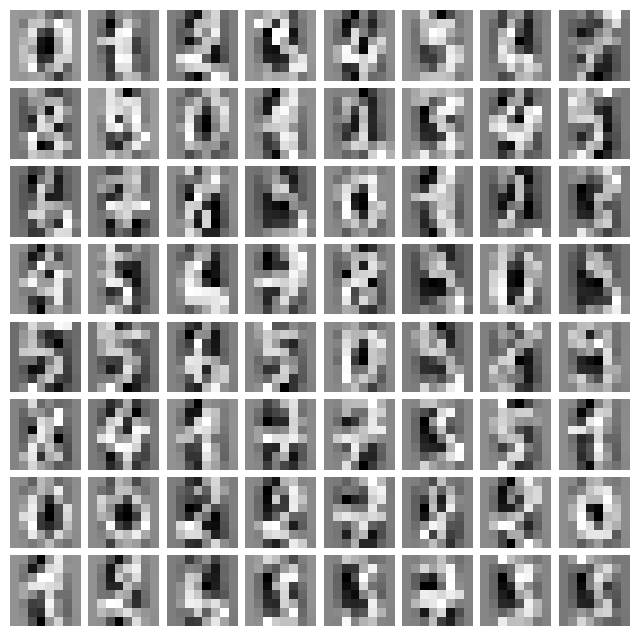

In [20]:
"""For Visualization of Data"""

num_rows = 8
num_cols = 8
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 8))
for i in range(num_rows):
    for j in range(num_cols):
        image = data_centered[i * num_cols + j].reshape(8, 8)
        axes[i, j].imshow(image, cmap='gray')
        axes[i, j].axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig('./plots/data_centered')
plt.show()

In [7]:
"""Finding the covariance matrix of the centered data"""

data_centered_cov = Covariance(data_centered)
data_standard_cov = Covariance(data_standard)


In [8]:
"""Finding the eigenvalue and eigenvector of the covariance matrix"""
eigenvalue , eigenvector =  eigh(data_centered_cov)
eigenvalue_std , eigenvector_std =  eigh(data_standard_cov)


In [9]:
eigenvector.shape

(64, 64)

In [10]:
sorted_index = np.argsort(eigenvalue)[::-1]
sorted_eigenvalue = eigenvalue[sorted_index]
sorted_eigenvectors = eigenvector[:,sorted_index]


In [11]:
sorted_index_std = np.argsort(eigenvalue_std)[::-1]
sorted_eigenvalue_std = eigenvalue_std[sorted_index_std]
sorted_eigenvectors_std = eigenvector_std[:,sorted_index_std]


### Plot of Cumulative Variance Explained by Principal Components

Number of components contributing to 90% of variance: 21


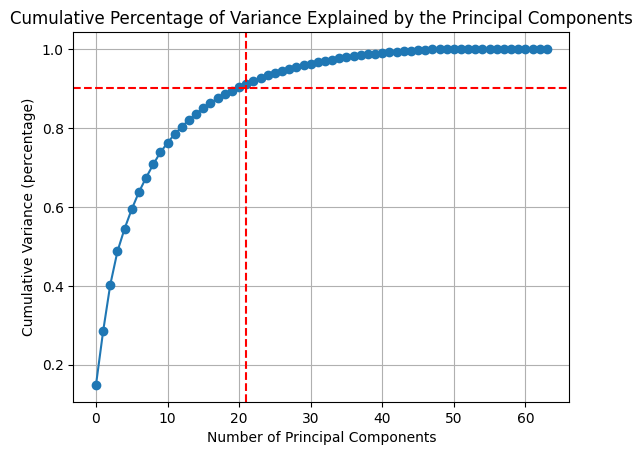

In [12]:
total_variance = np.sum(sorted_eigenvalue)
explained_variance_ratio = sorted_eigenvalue / total_variance
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance (percentage)')
plt.title('Cumulative Percentage of Variance Explained by the Principal Components')
plt.grid()

n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Number of components contributing to 90% of variance: {n_components_90}")

plt.axvline(x=n_components_90, color='r', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='--')
plt.savefig('./plots/Cumulative Variance Explained by Principal Components')
plt.show()

In [ ]:
# For Checking of Standard Deviation

total_variance_std = np.sum(sorted_eigenvalue_std)
explained_variance_ratio_std = sorted_eigenvalue_std / total_variance_std
cumulative_variance_std = np.cumsum(explained_variance_ratio_std)

plt.plot(cumulative_variance_std, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.grid()

n_components_90_std = np.argmax(cumulative_variance_std >= 0.90) + 1
print(f"Number of components contributing to 90% of variance: {n_components_90_std}")

plt.axvline(x=n_components_90_std, color='r', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='--')
plt.savefig('./plots/Cumulative Variance Explained by Principal Components')
plt.show()

### Plot of Reconstruction of the data with the 21 eigenvectors 

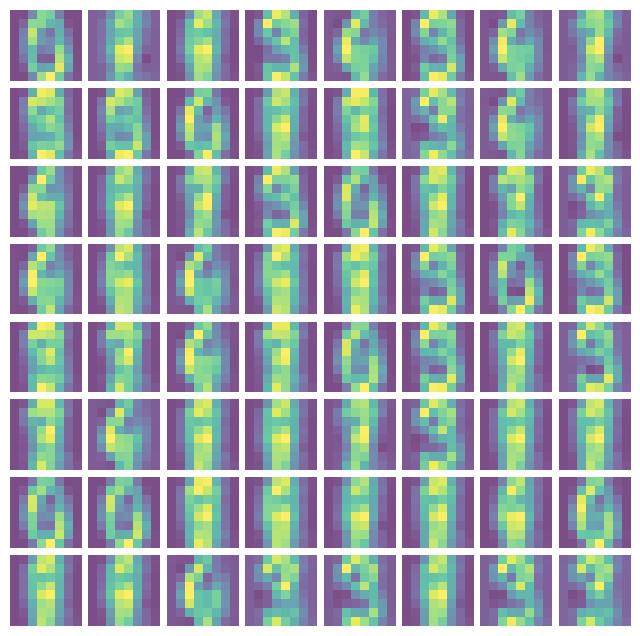

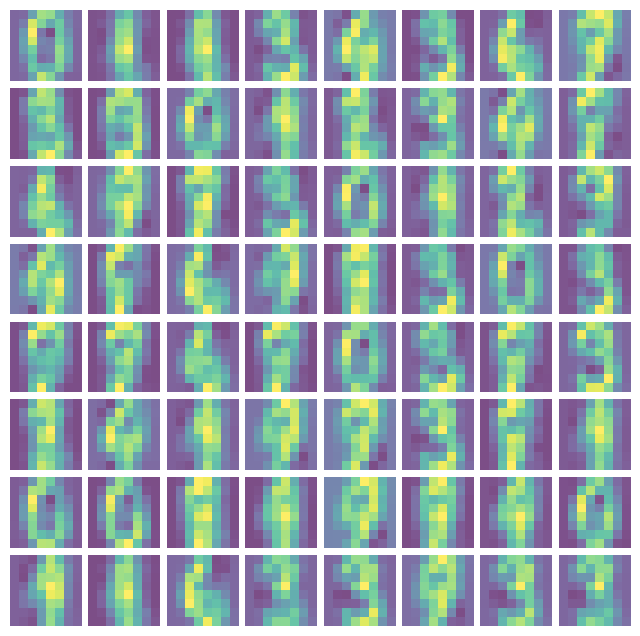

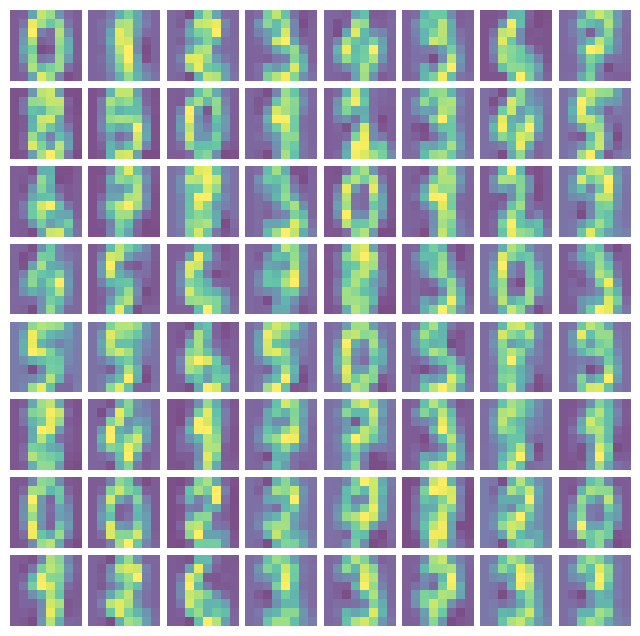

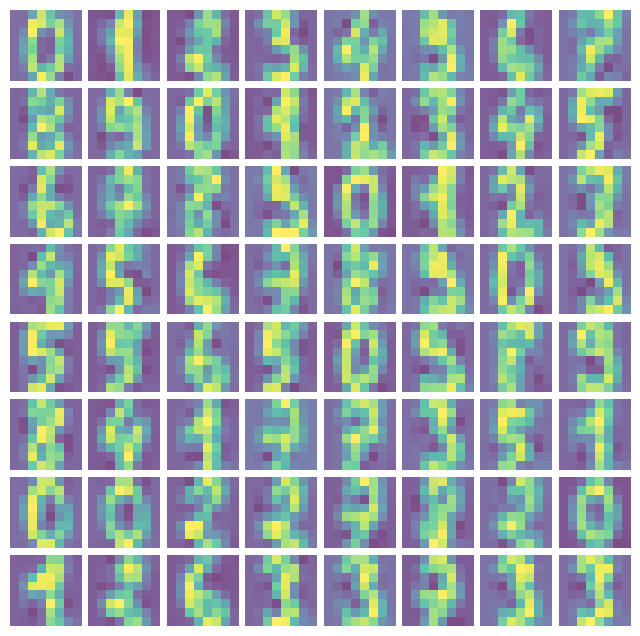

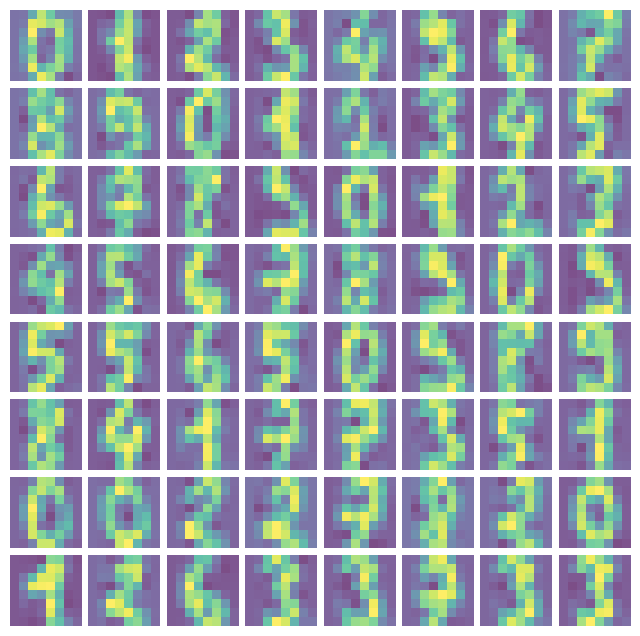

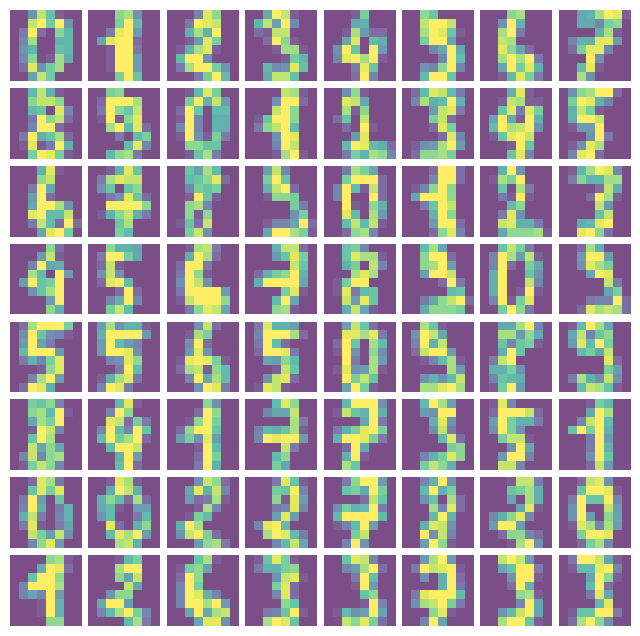

In [15]:
"""Reconstruction of the data with the 21 eigenvecctors"""

n_eigenvectors = [2, 4, 8, 16,21,64]

for i in n_eigenvectors:
    n_PCA_components = i
    selected_eigenvectors = sorted_eigenvectors[:, :n_PCA_components]
    reduced_data = np.dot(data_centered, selected_eigenvectors)
    reconstructed_data = np.dot(reduced_data, selected_eigenvectors.T)
    reconstructed_data = (reconstructed_data) + data_mean


    num_rows = 8
    num_cols = 8

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 8))

    for i in range(num_rows):
        for j in range(num_cols):

            reconstructed_image = reconstructed_data[i * num_cols + j].reshape(8, 8)
            axes[i, j].imshow(reconstructed_image, cmap='viridis', alpha=0.7, aspect='auto')
            axes[i, j].axis('off')

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.savefig(f'./plots/Reconstruction of the data with the {n_PCA_components} PCA Components')
    # plt.title(f'Reconstruction of the data with the {n_PCA_components} PCA Components')
    plt.show()

### Plots of Reconstruction of the data with the 21 eigenvecctors (standardised Data)


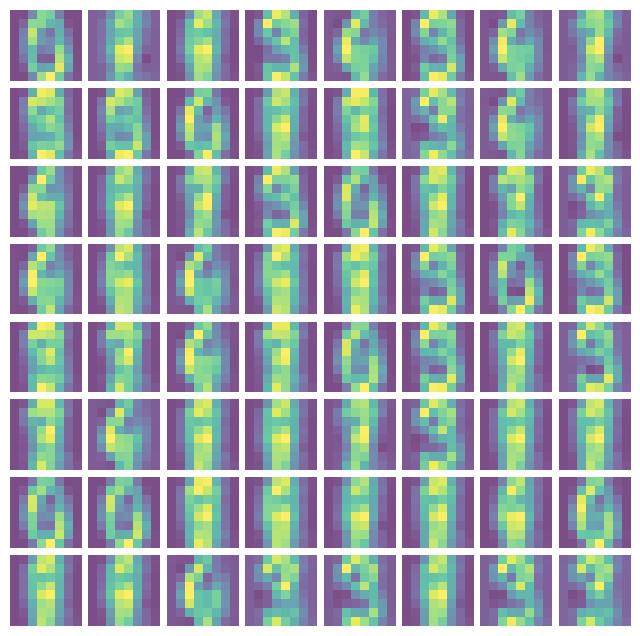

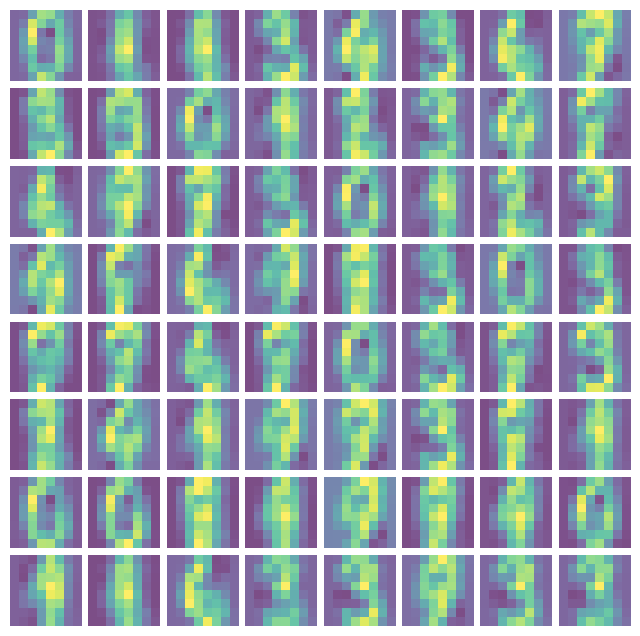

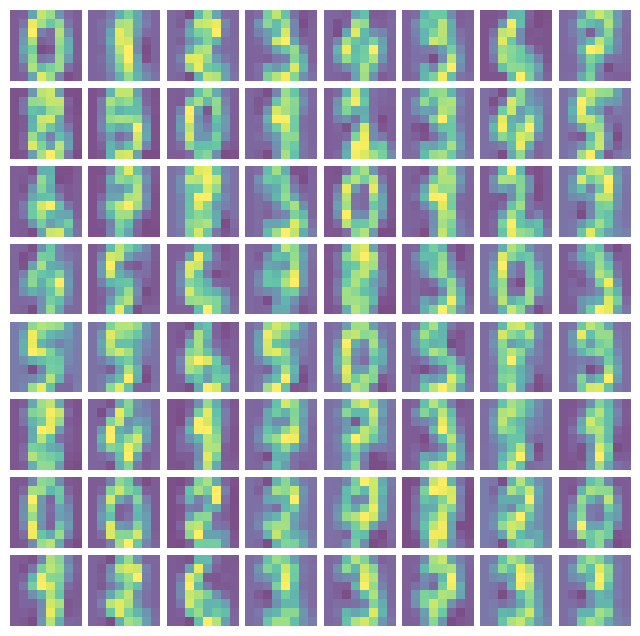

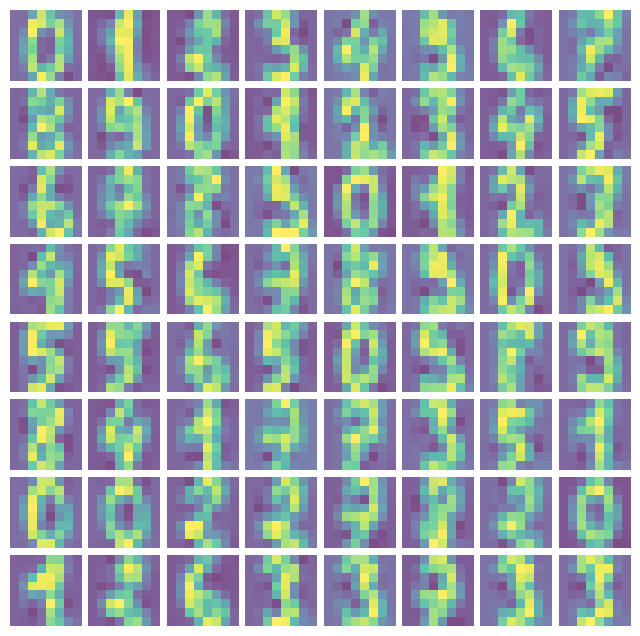

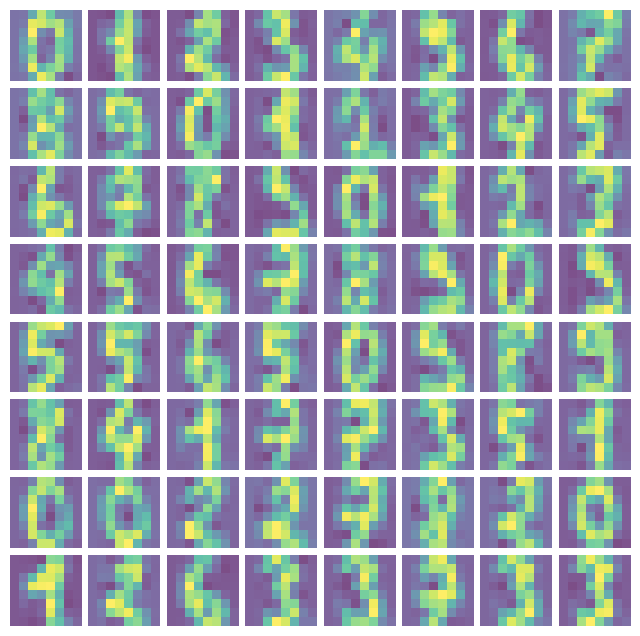

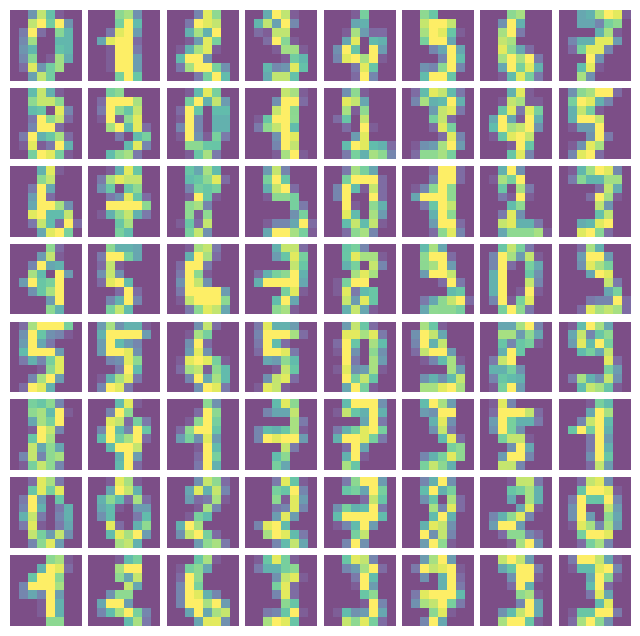

In [16]:
"""Reconstruction of the data with the 21 eigenvecctors"""

n_eigenvectors = [2, 4, 8, 16,21,64]

for i in n_eigenvectors:
    n_PCA_components = i
    selected_eigenvectors_std = sorted_eigenvectors_std[:, :n_PCA_components]
    reduced_data_std = np.dot(data_standard, selected_eigenvectors_std)
    reconstructed_data_std = np.dot(reduced_data_std, selected_eigenvectors_std.T)
    reconstructed_data_std = (reconstructed_data_std * std) + data_mean


    num_rows = 8
    num_cols = 8

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 8))

    for i in range(num_rows):
        for j in range(num_cols):
            reconstructed_image = reconstructed_data_std[i * num_cols + j].reshape(8, 8)
            axes[i, j].imshow(reconstructed_image, cmap='viridis', alpha=0.7, aspect='auto')
            axes[i, j].axis('off')

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.savefig(f'./plots/Reconstruction of the data with the {n_PCA_components} PCA Components(standardised)')
    plt.show()

### Finding the Reconstruction Error

In [17]:
dimensions = [2, 4, 8, 16,21,64]

mse_values = {}

for n_components in dimensions:
    selected_eigenvectors = sorted_eigenvectors[:, :n_components]
    
    reduced_data = np.dot(data_centered, selected_eigenvectors)
    
    reconstructed_data = np.dot(reduced_data, selected_eigenvectors.T)
    
    reconstructed_data = (reconstructed_data) + data_mean
    
    mse = np.mean(np.square(data_raw - reconstructed_data))
    
    mse_values[n_components] = mse

for n_components, mse in mse_values.items():
    print(f"Dimension {n_components}: MSE = {mse:.4f}")

optimal_dimension = min(mse_values, key=mse_values.get)
print(f"Optimal dimension based on MSE: {optimal_dimension}")

Dimension 2: MSE = 13.4210
Dimension 4: MSE = 9.6280
Dimension 8: MSE = 6.1218
Dimension 16: MSE = 2.8272
Dimension 21: MSE = 1.8173
Dimension 64: MSE = 0.0000
Optimal dimension based on MSE: 64


In [ ]:
#error in terms of eigenvector = avg of remaining eigenvectors

# To DO

### The below Code are for testing Question 2 (PCA)

In [25]:
data_Q2 = np.array([
    [ 5.51, 5.35 ,3.5],
    [ 20.82, 24.03 ,3.5],
    [ -0.77, -0.57 ,3.5],
    [ 19.30, 19.38 ,3.5],
    [ 14.24, 12.77 ,3.5],
    [ 9.74, 9.68 ,3.5],
    [ 11.59, 12.06 ,3.5],
    [ -6.08, -5.22 ,3.5]
])

data_Q3_mean = ComputeMean(data_Q2)
d_= data_Q2-data_Q3_mean
data_Q3_cov_ = Covariance(d_)

eigenvalue , eigenvector =  eigh(data_Q3_cov_)
print('eigenvalue',eigenvalue)

print('eigenvector',eigenvector)
data_Q3_cov_
d_

eigenvalue [  0.81663462 181.45636359]
eigenvector [[-0.71990351  0.69407416]
 [ 0.69407416  0.71990351]]


array([[-3.783750e+00, -4.335000e+00],
       [ 1.152625e+01,  1.434500e+01],
       [-1.006375e+01, -1.025500e+01],
       [ 1.000625e+01,  9.695000e+00],
       [ 4.946250e+00,  3.085000e+00],
       [ 4.462500e-01, -5.000000e-03],
       [ 2.296250e+00,  2.375000e+00],
       [-1.537375e+01, -1.490500e+01]])